In [1]:
import numpy as np
import cv2
import cv2.aruco as aruco
import PIL
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib nbagg
from OpenGL.GL import *
from OpenGL.GLU import *
import math
import grafkom1Framework as graphics


In [6]:
cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
    parameters =  aruco.DetectorParameters_create()


    '''    detectMarkers(...)
        detectMarkers(image, dictionary[, corners[, ids[, parameters[, rejectedI
        mgPoints]]]]) -> corners, ids, rejectedImgPoints
        '''
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    #if len(corners) != 0:
    #    print(corners)


    gray = aruco.drawDetectedMarkers(frame.copy(), corners,ids)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
# All Library

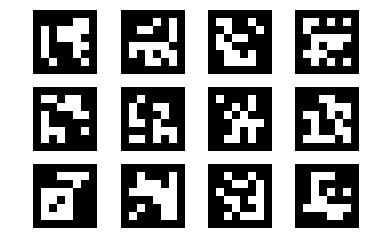

In [19]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("markers.jpeg")
plt.show()

In [13]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Calibration Camera  USE Matlab ToolBox?

<IPython.core.display.Javascript object>


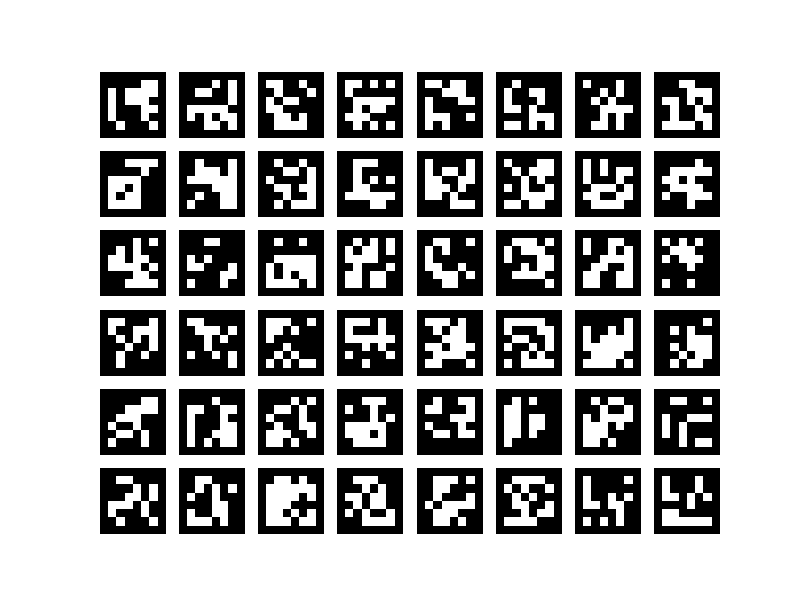

In [22]:
workdir = "data/"

aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 8
ny = 6
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig(workdir + "markers.pdf")
plt.show()
#plt.close()

In [ ]:
# Load Model https://github.com/edward344/PyOpenGL-sample

In [2]:
class objItem(object):

    def __init__(self):
        self.angle = 0
        self.vertices = []
        self.faces = []
        self.coordinates = [0, 0, -65]  # [x,y,z]
        self.teddy = graphics.ObjLoader("teddy.obj")
        self.position = [0, 0, -50]

    def render_scene(self):
        glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
        glBlendFunc(GL_SRC_ALPHA, GL_ONE_MINUS_SRC_ALPHA)
        glClearColor(0.902, 0.902, 1, 0.0)
        glMatrixMode(GL_MODELVIEW)
        glLoadIdentity()
        gluLookAt(0, 0, 0, math.sin(math.radians(self.angle)), 0, math.cos(math.radians(self.angle)) * -1, 0, 1, 0)
        glTranslatef(self.coordinates[0], self.coordinates[1], self.coordinates[2])

In [3]:
import pygame

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
pygame.init()
pygame.display.set_mode((640, 480), pygame.DOUBLEBUF | pygame.OPENGL)
pygame.display.set_caption("Teddy - Tugas Grafkom 1")
clock = pygame.time.Clock()
# Function checker
glDisable(GL_TEXTURE_2D)
glEnable(GL_DEPTH_TEST)
glEnable(GL_BLEND)
glEnable(GL_CULL_FACE)
glMatrixMode(GL_PROJECTION)
gluPerspective(45.0, float(800) / 600, .1, 1000.)
glMatrixMode(GL_MODELVIEW)
glLoadIdentity()

objectTeddy = objItem()
done = False
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            done = True

    objectTeddy.render_scene()
    objectTeddy.teddy.render_scene()
    pygame.display.flip()
    clock.tick(30)
pygame.quit()